# BENCHMARK

In [1]:
import time
import random
import numpy as np
from collections import defaultdict


def gerar_dados_sinteticos(n_particulas, n_pontos=10):
    tipos = ["Fiber", "Fragment", "Film", "Pellet", "Other"]
    dados = []

    for _ in range(n_particulas):
        dados.append({
            "ponto": f"P{random.randint(1, n_pontos)}",
            "tipo": random.choice(tipos),
            "comprimento_um": random.uniform(50, 5000),
            "area_um2": random.uniform(100, 20000)
        })

    return dados


def benchmark(n_particulas, repeticoes=5):
    tempos = []

    for _ in range(repeticoes):
        dados = gerar_dados_sinteticos(n_particulas)

        pontos = {f"P{i}": {"volume_L": 1.0} for i in range(1, 11)}

        inicio = time.perf_counter()

        soma_comprimento = defaultdict(float)
        soma_area = defaultdict(float)
        contagem = defaultdict(int)

        for mp in dados:
            ponto = mp["ponto"]
            soma_comprimento[ponto] += mp["comprimento_um"]
            soma_area[ponto] += mp["area_um2"]
            contagem[ponto] += 1

        # normalização
        for ponto in pontos:
            V = pontos[ponto]["volume_L"]
            _ = soma_comprimento[ponto] / V
            _ = soma_area[ponto] / V
            _ = contagem[ponto] / V

        fim = time.perf_counter()
        tempos.append(fim - inicio)

    return np.mean(tempos), np.std(tempos)


cenarios = [10, 100, 1000, 10000, 50000]

for n in cenarios:
    media, desvio = benchmark(n)
    print(f"{n} partículas → {media:.6f} s ± {desvio:.6f}")

10 partículas → 0.000025 s ± 0.000021
100 partículas → 0.000055 s ± 0.000004
1000 partículas → 0.000465 s ± 0.000024
10000 partículas → 0.011809 s ± 0.002149
50000 partículas → 0.050019 s ± 0.006780


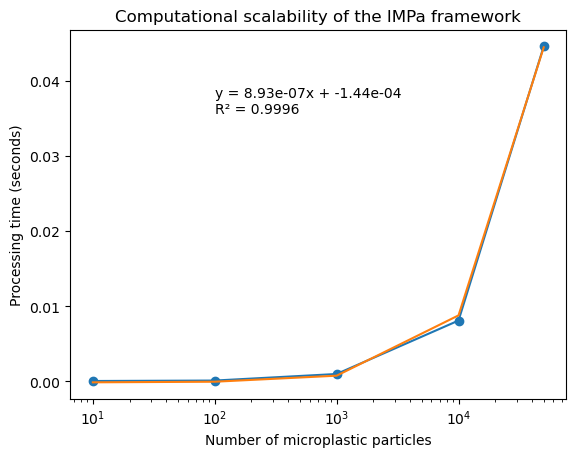

In [2]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


def gerar_dados_sinteticos(n_particulas, n_pontos=10):
    tipos = ["Fiber", "Fragment", "Film", "Pellet", "Other"]
    dados = []

    for _ in range(n_particulas):
        dados.append({
            "ponto": f"P{random.randint(1, n_pontos)}",
            "tipo": random.choice(tipos),
            "comprimento_um": random.uniform(50, 5000),
            "area_um2": random.uniform(100, 20000)
        })

    return dados


def benchmark(n_particulas, repeticoes=5):
    tempos = []

    for _ in range(repeticoes):
        dados = gerar_dados_sinteticos(n_particulas)
        pontos = {f"P{i}": {"volume_L": 1.0} for i in range(1, 11)}

        inicio = time.perf_counter()

        soma_comprimento = defaultdict(float)
        soma_area = defaultdict(float)
        contagem = defaultdict(int)

        for mp in dados:
            ponto = mp["ponto"]
            soma_comprimento[ponto] += mp["comprimento_um"]
            soma_area[ponto] += mp["area_um2"]
            contagem[ponto] += 1

        for ponto in pontos:
            V = pontos[ponto]["volume_L"]
            _ = soma_comprimento[ponto] / V
            _ = soma_area[ponto] / V
            _ = contagem[ponto] / V

        fim = time.perf_counter()
        tempos.append(fim - inicio)

    return np.mean(tempos)


# =========================
# Executando Benchmark
# =========================

cenarios = [10, 100, 1000, 10000, 50000]
tempos_medios = []

for n in cenarios:
    tempo = benchmark(n)
    tempos_medios.append(tempo)

# Converter para arrays numpy
x = np.array(cenarios)
y = np.array(tempos_medios)

# =========================
# Regressão Linear
# =========================

coef = np.polyfit(x, y, 1)
polinomio = np.poly1d(coef)
y_tendencia = polinomio(x)

# Cálculo do R²
y_pred = polinomio(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# =========================
# Plot
# =========================

plt.figure()

plt.plot(x, y, marker='o')
plt.plot(x, y_tendencia)

plt.xlabel("Number of microplastic particles")
plt.ylabel("Processing time (seconds)")
plt.title("Computational scalability of the IMPa framework")

plt.xscale("log")

# Equação no gráfico
equation_text = f"y = {coef[0]:.2e}x + {coef[1]:.2e}\nR² = {r2:.4f}"
plt.text(x[1], max(y)*0.8, equation_text)

# Salvar figura
plt.savefig("computational_scalability_IMPa.png", dpi=600, bbox_inches="tight")

plt.show()


# Benchmark de Memória

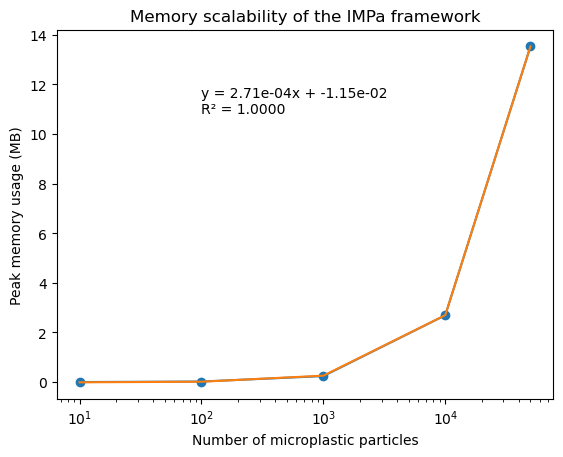

In [3]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import tracemalloc
from collections import defaultdict


def gerar_dados_sinteticos(n_particulas, n_pontos=10):
    tipos = ["Fiber", "Fragment", "Film", "Pellet", "Other"]
    dados = []

    for _ in range(n_particulas):
        dados.append({
            "ponto": f"P{random.randint(1, n_pontos)}",
            "tipo": random.choice(tipos),
            "comprimento_um": random.uniform(50, 5000),
            "area_um2": random.uniform(100, 20000)
        })

    return dados


def benchmark_memoria(n_particulas):
    tracemalloc.start()

    dados = gerar_dados_sinteticos(n_particulas)
    pontos = {f"P{i}": {"volume_L": 1.0} for i in range(1, 11)}

    soma_comprimento = defaultdict(float)
    soma_area = defaultdict(float)
    contagem = defaultdict(int)

    for mp in dados:
        ponto = mp["ponto"]
        soma_comprimento[ponto] += mp["comprimento_um"]
        soma_area[ponto] += mp["area_um2"]
        contagem[ponto] += 1

    for ponto in pontos:
        V = pontos[ponto]["volume_L"]
        _ = soma_comprimento[ponto] / V
        _ = soma_area[ponto] / V
        _ = contagem[ponto] / V

    memoria_atual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Converter para MB
    memoria_pico_mb = memoria_pico / (1024 * 1024)

    return memoria_pico_mb


# =========================
# Executando Benchmark
# =========================

cenarios = [10, 100, 1000, 10000, 50000]
memorias = []

for n in cenarios:
    mem = benchmark_memoria(n)
    memorias.append(mem)

x = np.array(cenarios)
y = np.array(memorias)

# Regressão linear
coef = np.polyfit(x, y, 1)
polinomio = np.poly1d(coef)
y_tendencia = polinomio(x)

# R²
y_pred = polinomio(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Plot
plt.figure()

plt.plot(x, y, marker='o')
plt.plot(x, y_tendencia)

plt.xlabel("Number of microplastic particles")
plt.ylabel("Peak memory usage (MB)")
plt.title("Memory scalability of the IMPa framework")

plt.xscale("log")

equation_text = f"y = {coef[0]:.2e}x + {coef[1]:.2e}\nR² = {r2:.4f}"
plt.text(x[1], max(y)*0.8, equation_text)

plt.savefig("memory_scalability_IMPa.png", dpi=600, bbox_inches="tight")

plt.show()


In [4]:
import os
import json
import random
import string
import time
import tracemalloc
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from core.calculo_impa import calcular_impa_e_mp


# =====================================================
# CONFIGURAÇÃO
# =====================================================
BASE_DIR = "benchmark_project"
DADOS_DIR = os.path.join(BASE_DIR, "dados")

SIZES = [100, 1000, 5000, 10000, 20000, 50000]


# =====================================================
# CRIAR ESTRUTURA DE PROJETO TEMPORÁRIA
# =====================================================
def criar_estrutura():
    if os.path.exists(BASE_DIR):
        shutil.rmtree(BASE_DIR)
    os.makedirs(DADOS_DIR)


# =====================================================
# GERAR DADOS SINTÉTICOS
# =====================================================
def gerar_dados(n_particulas):

    # Pontos amostrais fixos
    pontos = {
        f"P{i}": {"volume_L": random.uniform(0.5, 2.0)}
        for i in range(1, 6)
    }

    with open(os.path.join(DADOS_DIR, "pontos_amostrais.json"), "w", encoding="utf-8") as f:
        json.dump(pontos, f, indent=4)

    tipos = ["Fiber", "Fragment", "Pellet"]

    microplasticos = []

    for _ in range(n_particulas):
        ponto = random.choice(list(pontos.keys()))
        tipo = random.choice(tipos)

        microplasticos.append({
            "ponto": ponto,
            "imagem": "img.png",
            "objetiva": "10x",
            "tipo": tipo,
            "pontos_px": [],
            "comprimento_um": random.uniform(10, 300),
            "area_um2": random.uniform(5, 500)
        })

    with open(os.path.join(DADOS_DIR, "microplasticos.json"), "w", encoding="utf-8") as f:
        json.dump(microplasticos, f, indent=4)


# =====================================================
# BENCHMARK
# =====================================================
tempos = []
memorias = []

criar_estrutura()

for n in SIZES:

    gerar_dados(n)

    tracemalloc.start()

    inicio = time.time()
    calcular_impa_e_mp(BASE_DIR)
    fim = time.time()

    memoria_atual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempos.append(fim - inicio)
    memorias.append(memoria_pico / 1024**2)  # MB

    print(f"{n} partículas -> {tempos[-1]:.4f} s | {memorias[-1]:.2f} MB")


# =====================================================
# REGRESSÃO LINEAR
# =====================================================
X = np.array(SIZES).reshape(-1, 1)

modelo_tempo = LinearRegression().fit(X, tempos)
tend_tempo = modelo_tempo.predict(X)

modelo_memoria = LinearRegression().fit(X, memorias)
tend_memoria = modelo_memoria.predict(X)


# =====================================================
# PLOT FINAL
# =====================================================
plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Tempo
ax[0].plot(SIZES, tempos, 'o-', label="Measured")
ax[0].plot(SIZES, tend_tempo, '--', label="Linear Trend")
ax[0].set_xlabel("Number of Particles")
ax[0].set_ylabel("Execution Time (s)")
ax[0].set_title("IMPa-L Computation Time Scaling")
ax[0].legend()

# Memória
ax[1].plot(SIZES, memorias, 'o-', label="Measured")
ax[1].plot(SIZES, tend_memoria, '--', label="Linear Trend")
ax[1].set_xlabel("Number of Particles")
ax[1].set_ylabel("Peak Memory Usage (MB)")
ax[1].set_title("Memory Usage Scaling")
ax[1].legend()

fig.suptitle("Scalability Benchmark of the IMPa Computational Framework", fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig("benchmark_IMPa_real.png", dpi=600, bbox_inches="tight")
plt.show()


# =====================================================
# LIMPEZA FINAL
# =====================================================
shutil.rmtree(BASE_DIR)


FileNotFoundError: Arquivo impa_mp_resultados.json não encontrado.